# ***Shanti***

## Neste Notebook, estaremos rodando o treino de um dataset para um MVP do ***Shanti***, uma plataforma que se propoõe a promover acessibilidade na prática de exercícios físicos para todas as pessoas.

Este MVP se propõe a reconhecer movimentos de exercícios físicos, para que, futuramente, seja capaz de fornecer sugestões para corrigi-los.

OBS: Lembre-se de alterar o Hardware Accelerator para uma GPU. Você pode fazer isso indo em Runtime > Change runtime type > Hardware accelerator > T4 GPU

 Status da GPU

In [1]:
!nvidia-smi

Thu Nov 30 18:22:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#Instalando a biblioteca do YOLOv8

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 6.3 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO  # Importa a classe YOLO do pacote ultralytics
import os  # Importa o módulo os para funcionalidades relacionadas ao sistema operacional
from IPython.display import display, Image  # Importa funcionalidades para exibir imagens no Jupyter Notebook
from IPython import display  # Importa o módulo display do IPython

display.clear_output()  # Limpa a saída exibida no notebook
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 395, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [ ]:
!pip install roboflow  # Comando para instalar o pacote 'roboflow'

from roboflow import Roboflow  # Importa a classe Roboflow do pacote roboflow

# Inicialização de um objeto 'Roboflow' passando a chave de API como parâmetro.
# A chave de API deve ser substituída por sua chave pessoal da conta no Roboflow.
rf = Roboflow(api_key="SUA CHAVE AQUI")

# Utilização do objeto 'rf' para acessar o dataset
project = rf.workspace("amanda-arruda-2uirk").project("shanti").version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.217, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to SHANTI-1 in yolov8:: 100%|██████████| 8948/8948 [00:01<00:00, 6585.93it/s]


Importante!: Nos arquivos, em file > data.yaml, você deve alterar as três últimas linhas para

test: /content/SHANTI-1/test

train: /content/SHANTI-1/train

val: /content/SHANTI-1/valid

In [ ]:
# Executa o treinamento do dataset com 20 iterações
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Yoga-Pose-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

Atenção: Baixe o arquivo best.pt

In [ ]:
# A matriz de confusão é uma tabela que mostra o desempenho de um modelo de classificação, comparando as previsões do modelo com os valores reais, destacando os acertos e erros de classificação para cada classe.
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=900)

FileNotFoundError: ignored

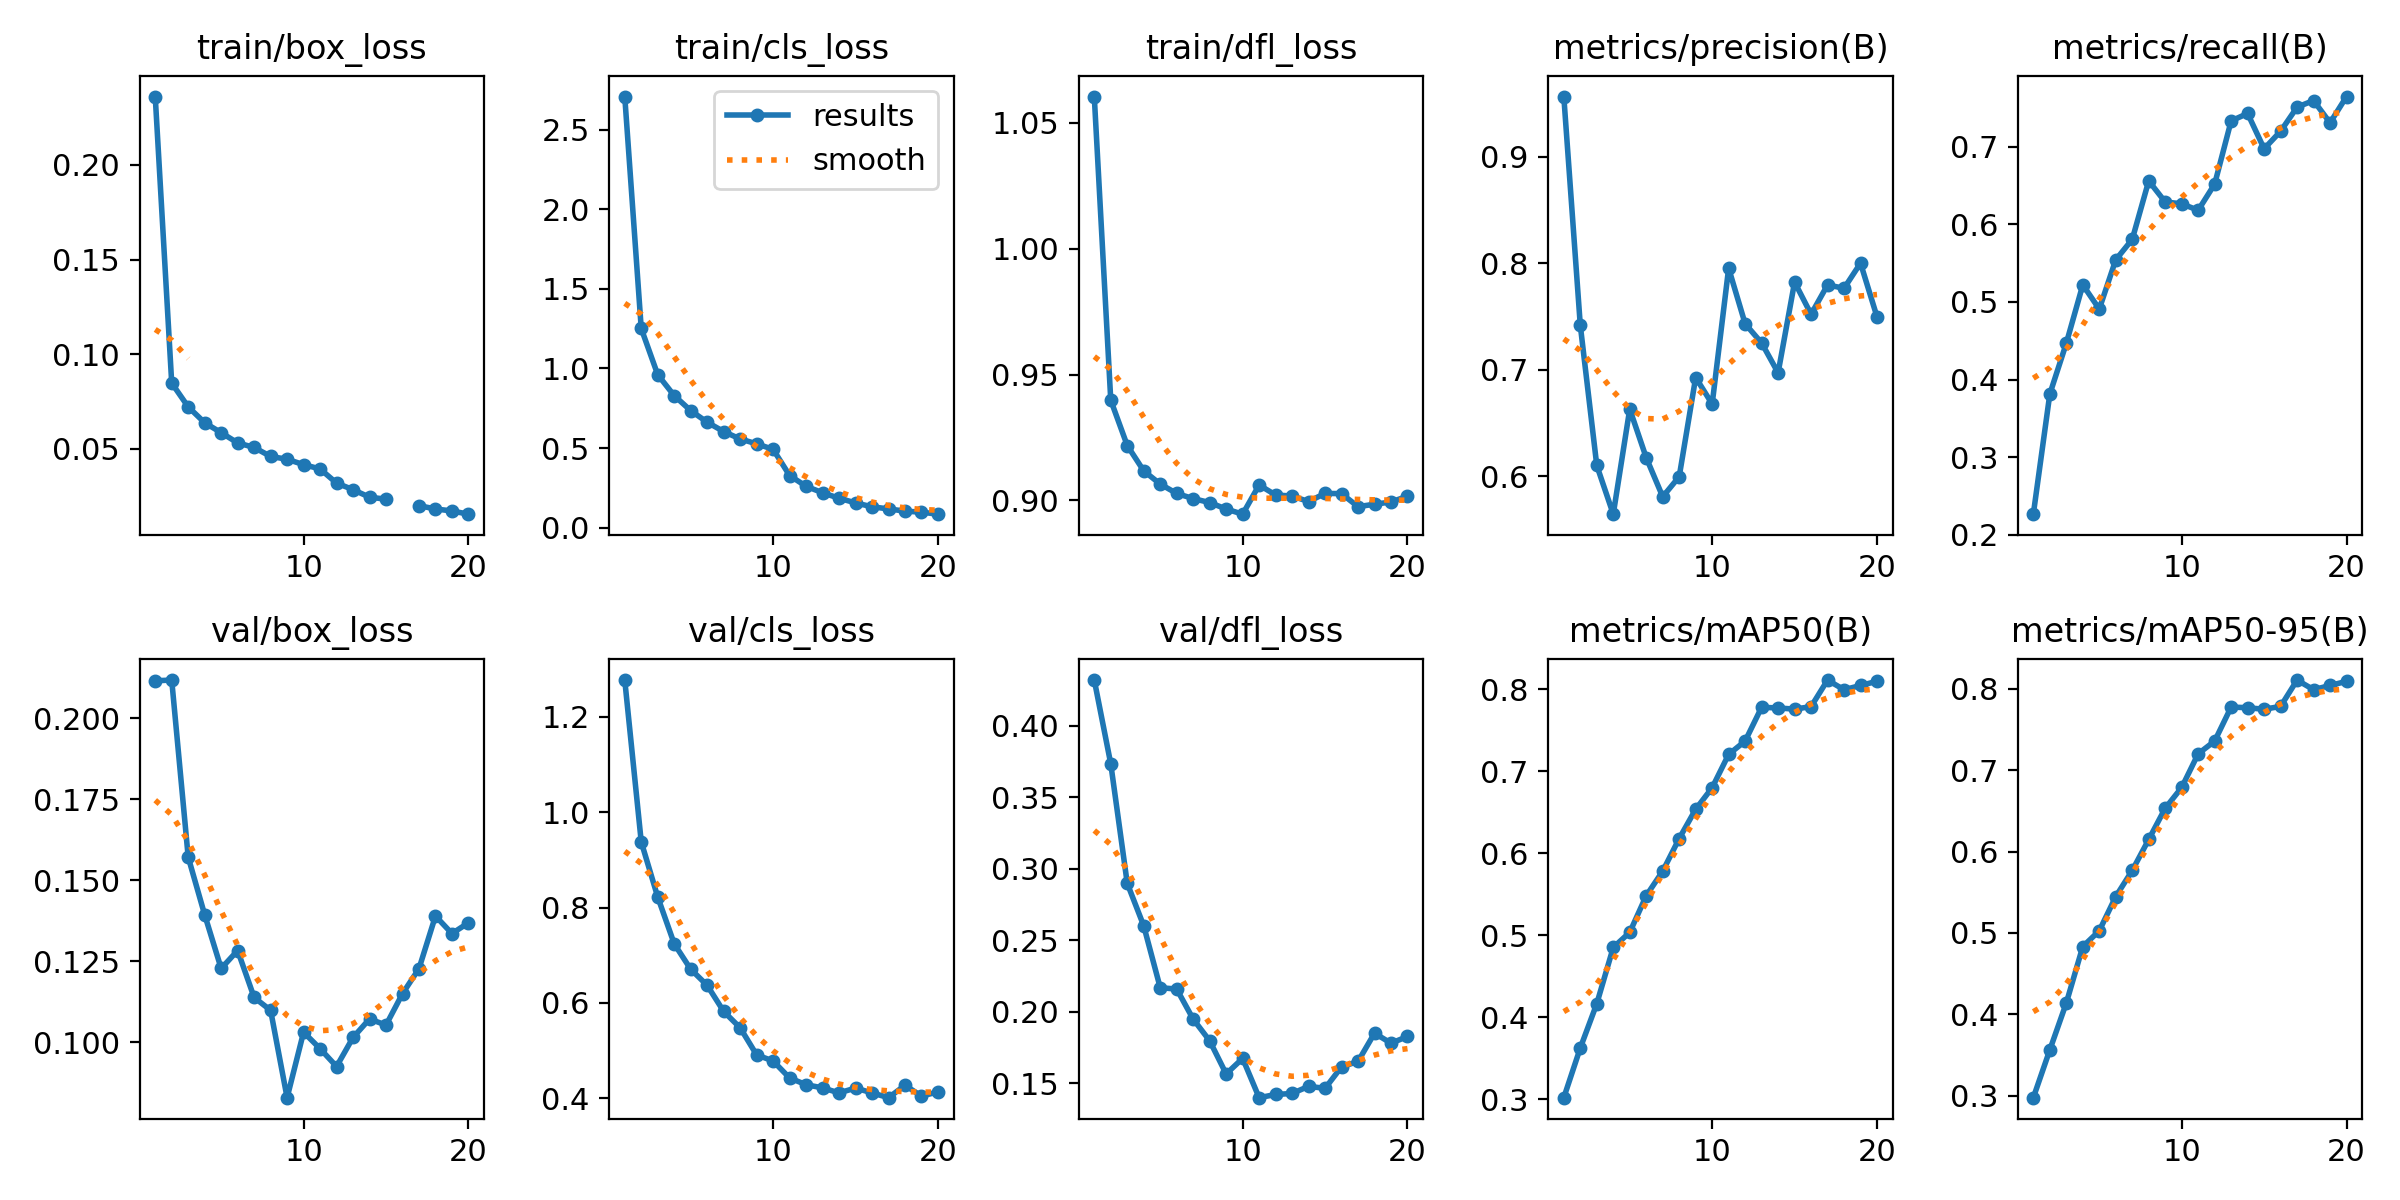

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=900)

In [ ]:
# train/box_loss: Representa a perda de caixa durante o treinamento, medindo o erro entre as coordenadas das caixas delimitadoras previstas e as coordenadas reais.
# train/cls_loss: Refere-se à perda de classificação durante o treinamento, indicando o erro na predição das classes dos objetos.
# train/dfl_loss: Indica a perda de desvio de pontos durante o treinamento, avaliando o erro na previsão dos desvios dos pontos de referência.
# val/box_loss: Representa a perda de caixa durante a validação, similar ao train/box_loss, mas aplicada na fase de validação do modelo.
# val/cls_loss: Refere-se à perda de classificação durante a validação, similar ao train/cls_loss, porém durante a validação do modelo.
# val/dfl_loss: Indica a perda de desvio de pontos durante a validação, similar ao train/dfl_loss, mas durante a validação do modelo.
# metrics/precision (B): Métrica que expressa a precisão dos resultados do modelo em relação aos objetos detectados, indicando a proporção de verdadeiros positivos em relação a todos os exemplos previstos como positivos.
# metrics/recall (B): Métrica que mostra a capacidade do modelo em recuperar todos os exemplos positivos, indicando a proporção de verdadeiros positivos em relação a todos os exemplos verdadeiramente positivos.
# metrics/mAP50(B): Métrica que calcula a média da precisão (AP) a um índice de confiança de 50% para diferentes classes, indicando a precisão média para diferentes níveis de confiança.
# metrics/mAP50-95(B): Métrica que calcula a média da precisão (AP) para índices de confiança variados (de 50% a 95%), fornecendo uma medida mais abrangente do desempenho do modelo em diferentes níveis de confiança.